# 1. Importation of packages and metrics functions

In [1]:
!pip install mplscience
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplscience

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.13.0
    Uninstalling importlib-metadata-4.13.0:
      Successfully uninstalled importlib-metadata-4.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.7 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 1.7.0 which is incompatible.
keyring 23.6.0 requires importlib-metadata>=3.6; python_version < "3.10", but you have importlib-metadata 1.7.0 which is incompatible.
ibis-framework 2.1.1 requires importlib-metadata<5,>=4; python_version < "3.8", but you have importlib-metadata 1.7.0 which is incompatible.
gym 0.26.2 requires importlib-metadata>=4.8.0; python_version < "3.10", but you have importlib-metadata 1.7.0 which is incompatible.
flask 2.2.2 requires importlib-metadata>=3.6.0; python_version < "3.10", but y

In [2]:
mplscience.available_styles()
mplscience.set_style()

['default', 'despine']


In [3]:
def correlation_score(y_true, y_pred):
    """Scores the predictions according to the competition rules. 
    
    It is assumed that the predictions are not constant.
    
    Returns the average of each sample's Pearson correlation coefficient"""
    if type(y_true) == pd.DataFrame: y_true = y_true.values
    if type(y_pred) == pd.DataFrame: y_pred = y_pred.values
    corrsum = 0
    for i in range(len(y_true)):
        corrsum += np.corrcoef(y_true[i], y_pred[i])[1, 0]
    return corrsum / len(y_true)

# 2. PCA per patient model

## 2.1. Importation of the results' files

In [4]:
test_preds_PCA_1 = np.load("/kaggle/input/openproblemdataquentinchappat/PCA per patient/1/test_preds_PCA_1.npy")
test_va_PCA_1 = np.load("/kaggle/input/openproblemdataquentinchappat/PCA per patient/1/test_va_PCA_1.npy")
train_preds_PCA_1 = np.load("/kaggle/input/openproblemdataquentinchappat/PCA per patient/1/train_preds_PCA_1.npy")
train_va_PCA_1 = np.load("/kaggle/input/openproblemdataquentinchappat/PCA per patient/1/train_va_PCA_1.npy")
test_preds_PCA_2 = np.load("/kaggle/input/openproblemdataquentinchappat/PCA per patient/2/test_preds_PCA_2.npy")
test_va_PCA_2 = np.load("/kaggle/input/openproblemdataquentinchappat/PCA per patient/2/test_va_PCA_2.npy")
train_preds_PCA_2 = np.load("/kaggle/input/openproblemdataquentinchappat/PCA per patient/2/train_preds_PCA_2.npy")
train_va_PCA_2 = np.load("/kaggle/input/openproblemdataquentinchappat/PCA per patient/2/train_va_PCA_2.npy")
test_preds_PCA_3 = np.load("/kaggle/input/openproblemdataquentinchappat/PCA per patient/3/test_preds_PCA_3.npy")
test_va_PCA_3 = np.load("/kaggle/input/openproblemdataquentinchappat/PCA per patient/3/test_va_PCA_3.npy")
train_preds_PCA_3 = np.load("/kaggle/input/openproblemdataquentinchappat/PCA per patient/3/train_preds_PCA_3.npy")
train_va_PCA_3 = np.load("/kaggle/input/openproblemdataquentinchappat/PCA per patient/3/train_va_PCA_3.npy")
test_preds_PCA_4 = np.load("/kaggle/input/openproblemdataquentinchappat/PCA per patient/4/test_preds_PCA_4.npy")
test_va_PCA_4 = np.load("/kaggle/input/openproblemdataquentinchappat/PCA per patient/4/test_va_PCA_4.npy")
train_preds_PCA_4 = np.load("/kaggle/input/openproblemdataquentinchappat/PCA per patient/4/train_preds_PCA_4.npy")
train_va_PCA_4 = np.load("/kaggle/input/openproblemdataquentinchappat/PCA per patient/4/train_va_PCA_4.npy")

## 2.2. Concatenation of the results in one array

In [5]:
test_preds_PCA = np.concatenate((test_preds_PCA_1, test_preds_PCA_2, test_preds_PCA_3, test_preds_PCA_4))
test_va_PCA = np.concatenate((test_va_PCA_1, test_va_PCA_2, test_va_PCA_3, test_va_PCA_4))
train_preds_PCA = np.concatenate((train_preds_PCA_1, train_preds_PCA_2, train_preds_PCA_3, train_preds_PCA_4))
train_va_PCA = np.concatenate((train_va_PCA_1, train_va_PCA_2, train_va_PCA_3, train_va_PCA_4))

## 2.3. Computation of the results

In [6]:
mse_train_PCA = mean_squared_error(train_va_PCA, train_preds_PCA)
corrscore_train_PCA = correlation_score(train_va_PCA, train_preds_PCA)

mse_test_PCA = mean_squared_error(test_va_PCA, test_preds_PCA)
corrscore_test_PCA = correlation_score(test_va_PCA, test_preds_PCA)

In [7]:
print("The MSE train for PCA per patient model is:", mse_train_PCA)
print("The correlation score train for PCA per patient model is:", corrscore_train_PCA)
print("The MSE test for PCA per patient model is:", mse_test_PCA)
print("The correlation score test for PCA per patient model is:", corrscore_test_PCA)

The MSE train for PCA per patient model is: 2.175620334147274
The correlation score train for PCA per patient model is: 0.4630287759184809
The MSE test for PCA per patient model is: 2.8098649888187164
The correlation score test for PCA per patient model is: 0.3615834370787006


# 3. Pearson correlation per patient model

## 3.1. Importation of the results' files

In [8]:
test_preds_pearson_1 = np.load("/kaggle/input/openproblemdataquentinchappat/Pearson per patient/1/test_preds_pearson_1.npy")
test_va_pearson_1 = np.load("/kaggle/input/openproblemdataquentinchappat/Pearson per patient/1/test_va_pearson_1.npy")
train_preds_pearson_1 = np.load("/kaggle/input/openproblemdataquentinchappat/Pearson per patient/1/train_preds_pearson_1.npy")
train_va_pearson_1 = np.load("/kaggle/input/openproblemdataquentinchappat/Pearson per patient/1/train_va_pearson_1.npy")
test_preds_pearson_2 = np.load("/kaggle/input/openproblemdataquentinchappat/Pearson per patient/2/test_preds_pearson_2.npy")
test_va_pearson_2 = np.load("/kaggle/input/openproblemdataquentinchappat/Pearson per patient/2/test_va_pearson_2.npy")
train_preds_pearson_2 = np.load("/kaggle/input/openproblemdataquentinchappat/Pearson per patient/2/train_preds_pearson_2.npy")
train_va_pearson_2 = np.load("/kaggle/input/openproblemdataquentinchappat/Pearson per patient/2/train_va_pearson_2.npy")
test_preds_pearson_3 = np.load("/kaggle/input/openproblemdataquentinchappat/Pearson per patient/3/test_preds_pearson_3.npy")
test_va_pearson_3 = np.load("/kaggle/input/openproblemdataquentinchappat/Pearson per patient/3/test_va_pearson_3.npy")
train_preds_pearson_3 = np.load("/kaggle/input/openproblemdataquentinchappat/Pearson per patient/3/train_preds_pearson_3.npy")
train_va_pearson_3 = np.load("/kaggle/input/openproblemdataquentinchappat/Pearson per patient/3/train_va_pearson_3.npy")

## 3.2. Concatenation of the results in one array

In [9]:
test_preds_pearson = np.concatenate((test_preds_pearson_1, test_preds_pearson_2, test_preds_pearson_3))
test_va_pearson = np.concatenate((test_va_pearson_1, test_va_pearson_2, test_va_pearson_3))
train_preds_pearson = np.concatenate((train_preds_pearson_1, train_preds_pearson_2, train_preds_pearson_3))
train_va_pearson = np.concatenate((train_va_pearson_1, train_va_pearson_2, train_va_pearson_3))

## 3.3. Computation of the results

In [10]:
mse_train_pearson = mean_squared_error(train_va_pearson, train_preds_pearson)
corrscore_train_pearson = correlation_score(train_va_pearson, train_preds_pearson)

mse_test_pearson = mean_squared_error(test_va_PCA, test_preds_pearson)
corrscore_test_pearson = correlation_score(test_va_PCA, test_preds_pearson)

In [11]:
print("The MSE train for Pearson per patient model is:", mse_train_pearson)
print("The correlation score train for Pearson per patient model is:", corrscore_train_pearson)
print("The MSE test for Pearson per patient model is:", mse_test_pearson)
print("The correlation score test for Pearson per patient model is:", corrscore_test_pearson)

The MSE train for Pearson per patient model is: 2.488560558734378
The correlation score train for Pearson per patient model is: 0.4677711132506335
The MSE test for Pearson per patient model is: 2.7947769169767334
The correlation score test for Pearson per patient model is: 0.41055300542599255


# 4. Comparison of model performance

In [12]:
# create dataframe with columns = models, rows = metrics (MSE and correlation score)
df = pd.DataFrame({"PCA All": [2.875, 0.870],
                   "Pearson-R All": [2.901, 0.875],
                   "PCA Per-Patient": [2.810, 0.362],
                   "Pearson-R Per-Patient": [2.795, 0.411],
                   "SVD + LightGBM": [2.751, 0.878],
})
df.index = ["MSE", "Correlation Score"]
df

,PCA All,Pearson-R All,PCA Per-Patient,Pearson-R Per-Patient,SVD + LightGBM
MSE,2.875,2.901,2.810,2.795,2.751
Correlation Score,0.870,0.875,0.362,0.411,0.878


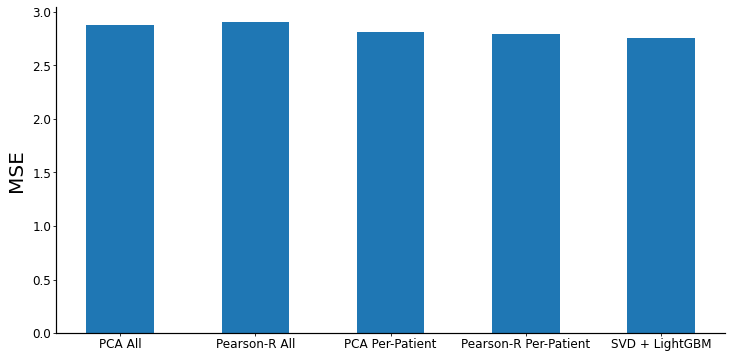

In [13]:
# visualize MSE across 5 models
fig, ax = plt.subplots(figsize=(12,6))
x = np.arange(len(df.columns))
plt1 = ax.bar(x, df.loc["MSE",:], width = .5)
ax.set_ylabel('MSE', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(list(df.columns))
plt.show()

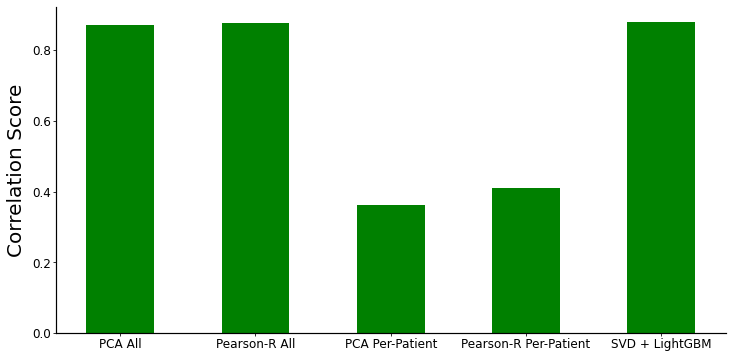

In [14]:
# visualize correlation scores across 5 models
fig, ax = plt.subplots(figsize=(12,6))
x = np.arange(len(df.columns))
plt1 = ax.bar(x, df.loc["Correlation Score",:], width = .5, color="green")
ax.set_ylabel('Correlation Score', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(list(df.columns))
plt.show()